In [6]:
import pandas as pd


In [7]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
516,517,15752081,Vassiliev,468,France,Female,56,10,0.00,3,0,1,62256.87,1
7808,7809,15649033,Echezonachukwu,603,Germany,Female,55,7,127723.25,2,1,0,139469.11,1
531,532,15749851,Brookes,702,Spain,Female,26,4,135219.57,1,0,1,59747.63,0
2614,2615,15640846,Chibueze,546,Germany,Female,58,3,106458.31,4,1,0,128881.87,1


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [11]:
df.duplicated().sum()

0

In [12]:
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited','Geography','Gender'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train_val, x_test, y_train_val, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.2, random_state=42)

In [13]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2579,365,30,0,127760.07,1,1,0,81537.85
7128,553,38,1,181110.13,2,1,0,184544.59
4082,778,29,6,150358.97,1,1,0,62454.01
2550,850,42,0,0.00,2,1,0,44165.84
4926,674,36,6,100762.64,1,1,0,182156.86
...,...,...,...,...,...,...,...,...
8871,466,30,3,0.00,1,1,0,193984.60
9826,789,40,4,0.00,2,1,0,137402.27
5268,691,28,1,0.00,2,0,0,92865.41
9666,758,35,5,0.00,2,1,0,95009.60


In [16]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [33]:
model = Sequential([Dense(units=7, activation='relu'),
                    Dense(units=8, activation='relu'),
                    Dense(units=1, activation='sigmoid')])
model.compile(loss='binary_crossentropy',metrics=['recall'])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10) #if val_loss doesn't go down in 10 epoches stop
                                     #we use it in the model.fit as a parameter



In [34]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [35]:
history = model.fit(X_train,y_train.values, validation_data=(X_val,y_val.values), epochs=300,class_weight={0:1.,1:4.},callbacks=early_stop) #y must be converted to array using .values to work with class_weight

                                                                  #used in classification
                                                                  #class_weight gives weight to each class; used when classes are inbalance, = list of weight for each class ex. {0:2,1:10}
                                                                  #sample_weight gives weight to each row; same reason of using, = list of weights for each row

Epoch 1/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2525.1064 - recall: 0.4179 - val_loss: 59.7945 - val_recall: 0.0000e+00
Epoch 2/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 179.6184 - recall: 0.5428 - val_loss: 120.2765 - val_recall: 0.9755
Epoch 3/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 170.9856 - recall: 0.5165 - val_loss: 27.9482 - val_recall: 0.0245
Epoch 4/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 180.6955 - recall: 0.5106 - val_loss: 417.1137 - val_recall: 1.0000
Epoch 5/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 199.4516 - recall: 0.5143 - val_loss: 464.3566 - val_recall: 1.0000
Epoch 6/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 190.4974 - recall: 0.5243 - val_loss: 269.5508 - val_recall: 0.9969
Epoch 7/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 184.9221 - recall: 0.5169 - val_loss: 43.3535 - val_recall: 0.7309
Epoch 8/300
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 163.2088 - recall: 0.5160 - val_lo

In [38]:
y_pred_val = model.predict(X_val)
y_pred_val = y_pred_val > 0.5
y_pred_val

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val,y_pred_val)

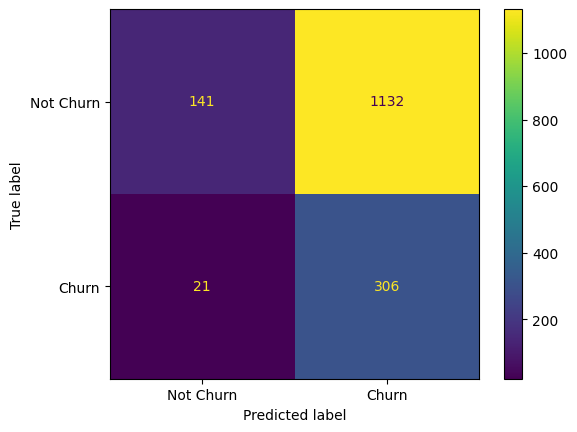

In [44]:
dp = ConfusionMatrixDisplay(cm,
                            display_labels=['Not Churn','Churn'])
dp.plot()